# OpenCV

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/tools/opencv.ipynb)

OpenCV comprend les fonctionnalités de traitement d'image de [Pillow](./pillow.ipynb) avec toute une série d'algorithmes d'apprentissage machine pour implémenter les cas d'utilisation de la [vision par ordinateur](../use-cases/computer-vision.ipynb), notamment la classification des images, la segmentation des images et la reconnaissance de formes.

- https://opencv.org/
- https://github.com/opencv/opencv

In [3]:
import sys

# Supprimer les commentaires pour installer
# !pip3 install -q -U matplotlib
# !pip3 install -q -U opencv-python

In [4]:
# Cette variable python est accessible depuis les commandes shell
work_directory = './opencv'

# Récupération des données (notamment pour Google Colab)
!curl --create-dirs -O --output-dir $work_directory 'https://raw.githubusercontent.com/digillia/Digillia-Colab/main/data/solvay_1927.jpeg'

# Installation d'Arial sur Linux
if sys.platform == 'linux' or sys.platform == 'linux2':
  # !sudo apt-get update && apt-get install fonts-arial
  !curl --create-dirs -O --output-dir '/usr/share/fonts/truetype' 'https://raw.githubusercontent.com/digillia/Digillia-Colab/main/data/Arial.ttf'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  245k  100  245k    0     0  6747k      0 --:--:-- --:--:-- --:--:--     0-:--:-- 6807k


In [5]:
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Lecture et affichage d'une image 

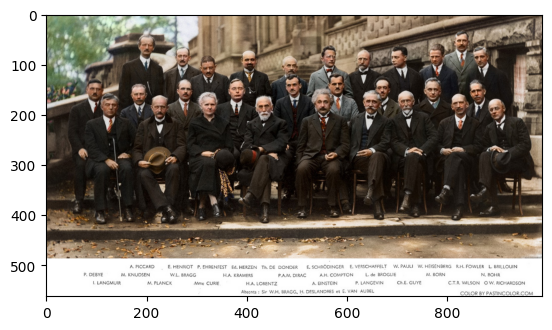

In [6]:
solvay_path = f'{work_directory}/solvay_1927.jpeg'
img = cv2.imread(solvay_path, cv2.IMREAD_COLOR)
# Conrairement à Pillow `display(img)` ne fonctionne pas
# Il faut utiliser matplotlib, mais d'abord, il faut convertir
# le codage interne BGR d'opencv en RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # éqivalent à plt.imshow(img[:, :, ::-1])

## Séparation des canaux RVB

Text(0.5, 1.0, 'Fusion des canaux')

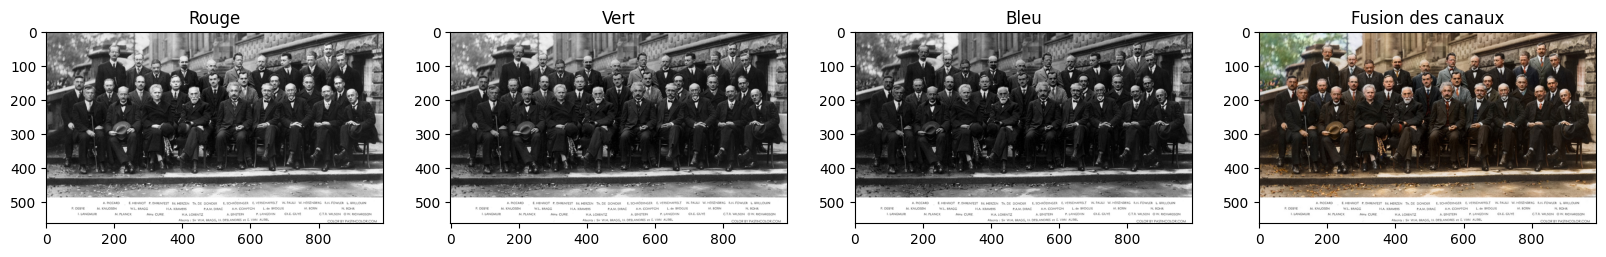

In [7]:
# Séparation des canaux RGB
img = cv2.imread(solvay_path, cv2.IMREAD_COLOR)
b, g, r = cv2.split(img)

# Affichage des canaux
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(r, cmap='gray'); plt.title('Rouge')
plt.subplot(142);plt.imshow(g, cmap='gray'); plt.title('Vert')
plt.subplot(143);plt.imshow(b, cmap='gray'); plt.title('Bleu')

# Fusionner les canaux dans une nouvelle image et afficher
merged = cv2.merge((b, g, r))
plt.subplot(144)
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
plt.title('Fusion des canaux')

## Recadrage, redimensionnement, et inversion

In [8]:
# Taille d'image
img = cv2.imread(solvay_path, cv2.IMREAD_COLOR)
img.shape

(562, 990, 3)

(100, 100, 3)

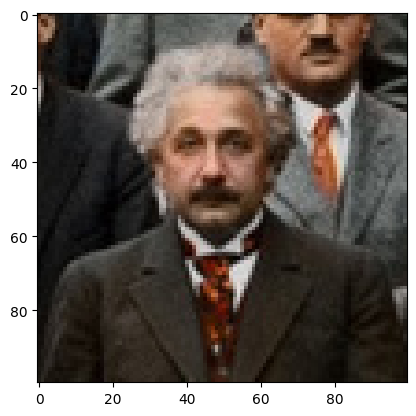

In [9]:
# Recadrage
cropped = img[140:240, 505:605]
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
cropped.shape

(400, 400, 3)

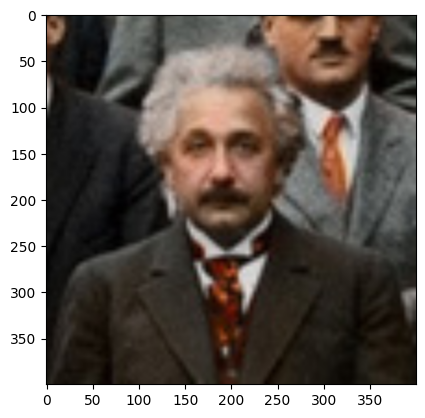

In [10]:
# Redimensionnement
cropped_4x = cv2.resize(cropped, None, fx=4, fy=4)
plt.imshow(cv2.cvtColor(cropped_4x, cv2.COLOR_BGR2RGB))
cropped_4x.shape

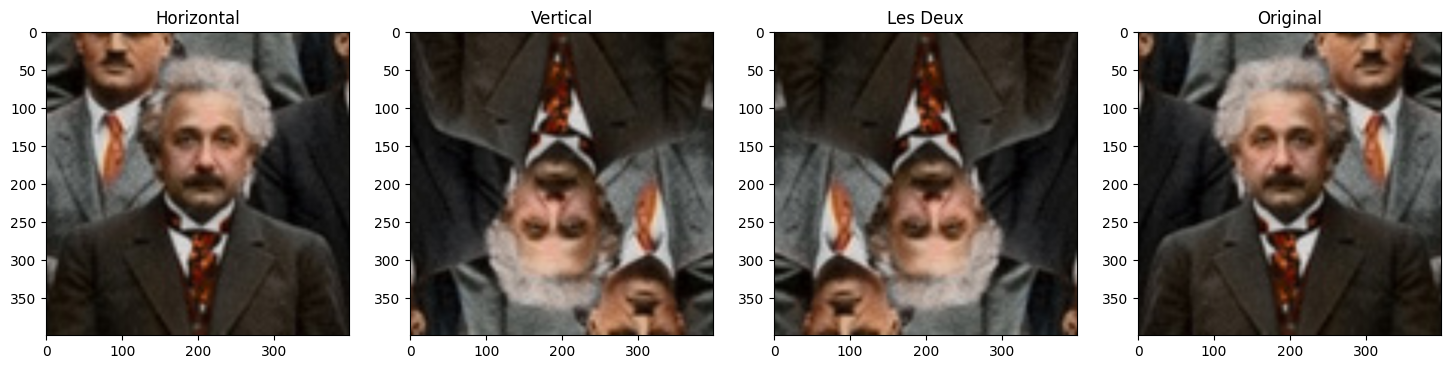

In [11]:
# Inversions
flipped_horz = cv2.flip(cropped_4x, 1)
flipped_vert = cv2.flip(cropped_4x, 0)
flipped_both = cv2.flip(cropped_4x, -1)

plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(cv2.cvtColor(flipped_horz, cv2.COLOR_BGR2RGB));plt.title('Horizontal');
plt.subplot(142);plt.imshow(cv2.cvtColor(flipped_vert, cv2.COLOR_BGR2RGB));plt.title('Vertical');
plt.subplot(143);plt.imshow(cv2.cvtColor(flipped_both, cv2.COLOR_BGR2RGB));plt.title('Les Deux');
plt.subplot(144);plt.imshow(cv2.cvtColor(cropped_4x, cv2.COLOR_BGR2RGB));plt.title('Original');

## Persistance d'image

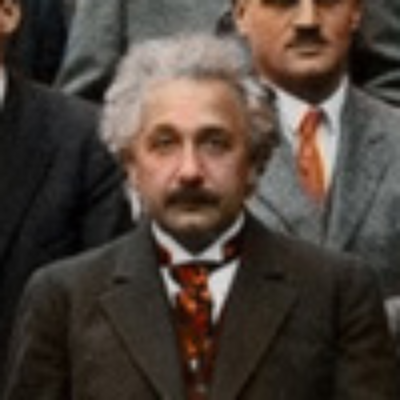

In [12]:
# Enregistrer une image
einstein_path = f'{work_directory}/einstein.png'
cv2.imwrite(einstein_path, cropped_4x)
Image(einstein_path)

## Annotations

In [13]:
# Copie d'image
img = cv2.imread(einstein_path, cv2.IMREAD_COLOR)
out = img.copy()

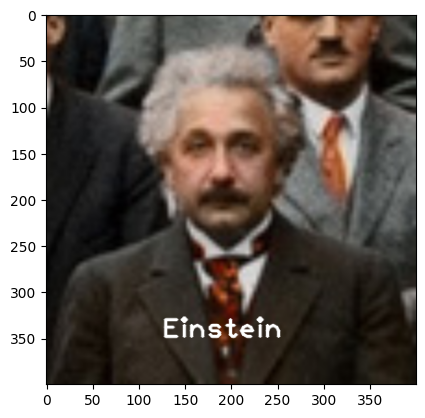

In [14]:
if hasattr(cv2, 'freetype'):
    # Créer le contexte
    ft = cv2.freetype.createFreeType2()
    # Charger la police de caractères
    ft.loadFontData(fontFileName='Arial.ttf', id=0)
    # Ajouter le texte
    ft.putText(img=out, text='Einstein', org=(125, 350), fontHeight=40, color=(255, 255, 255), thickness=5, line_type=cv2.LINE_AA)
else: # https://forum.opencv.org/t/module-cv2-has-no-attribute-freetype/12489
    cv2.putText(img=out, text='Einstein', org=(125, 350), fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA);
# Afficher le résultat
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

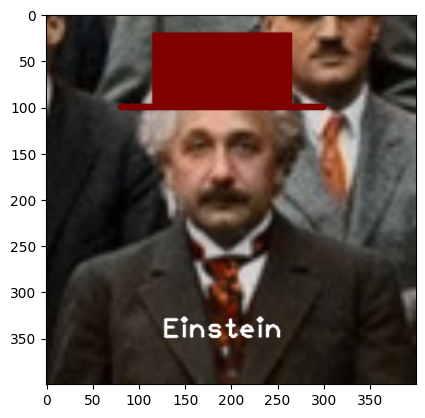

In [15]:
# Ajout de formes
cv2.line(out, (80, 100), (300, 100), (0, 0, 128), thickness=5, lineType=cv2.LINE_AA)
cv2.rectangle(out, (115, 20), (265, 100), (0, 0, 128), thickness=-1, lineType=cv2.LINE_AA) # thickness == -1 -> remplissage
# Afficher le résultat
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

In [16]:
# Ménage
!rm -rf $work_directory